Path to dataset files: C:\Users\kupit\.cache\kagglehub\datasets\blastchar\telco-customer-churn\versions\1
=== Dataset Overview ===
Shape: (7043, 21)

Columns:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='str')

Data Types:
customerID              str
gender                  str
SeniorCitizen         int64
Partner                 str
Dependents              str
tenure                int64
PhoneService            str
MultipleLines           str
InternetService         str
OnlineSecurity          str
OnlineBackup            str
DeviceProtection        str
TechSupport             str
StreamingTV             str
StreamingMovies         str
Contract                str
Pa

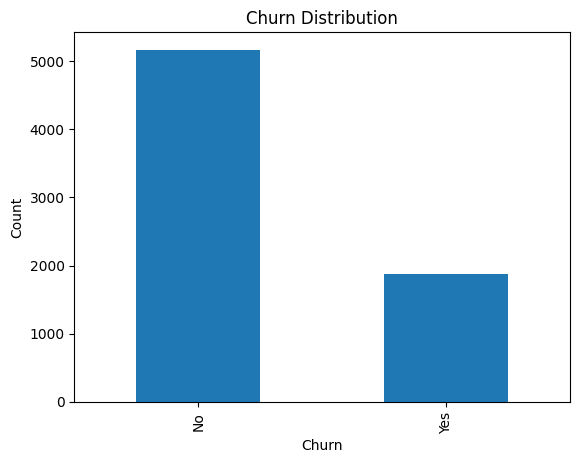

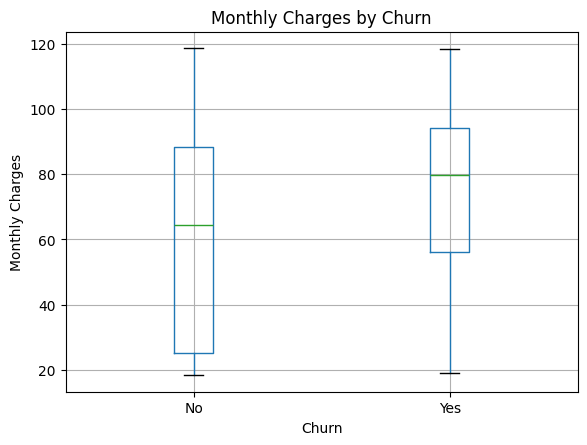

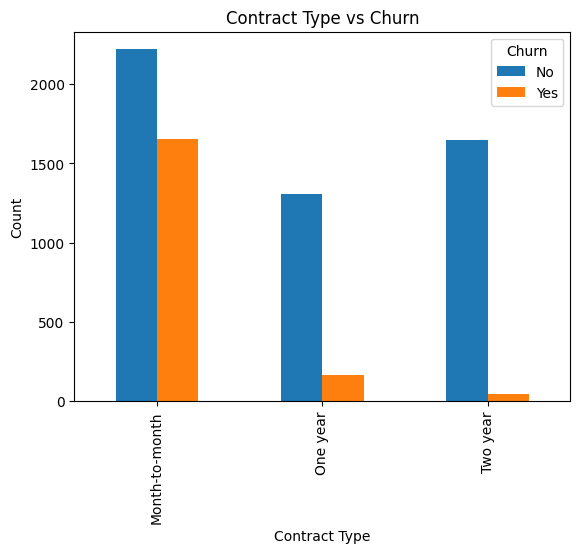

Features shape: (7043, 30)
Target shape: (7043,)
Target classes: ['No' 'Yes']


C:\Users\kupit\AppData\Local\Temp\ipykernel_12204\3188595338.py:66: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df['TotalCharges'].fillna(0, inplace=True)  # заполняем NaN нулями
C:\Users\kupit\AppData\Local\Temp\ipykernel_12204\3188595338.py:70: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

# Download dataset
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt

# 1. Download the Telco Customer Churn dataset
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

# 2. Load dataset into a pandas DataFrame
csv_path = os.path.join(path, "WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = pd.read_csv(csv_path)

# 3. Explore the dataset
print("=== Dataset Overview ===")
print("Shape:", df.shape)
print("\nColumns:")
print(df.columns)

print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())

# 4. Check target distribution
print("\n=== Churn Distribution ===")
print(df["Churn"].value_counts())

# 5. Visualize key features

# Churn distribution
df["Churn"].value_counts().plot(kind="bar")
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

# Monthly Charges by Churn
df.boxplot(column="MonthlyCharges", by="Churn")
plt.title("Monthly Charges by Churn")
plt.suptitle("")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()

# Contract type vs Churn
pd.crosstab(df["Contract"], df["Churn"]).plot(kind="bar")
plt.title("Contract Type vs Churn")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()

from sklearn.preprocessing import LabelEncoder

# 1. Handle missing values
# TotalCharges имеет 11 пропусков, их можно заполнить нулями или медианой
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # конвертируем строки в числа, некорректные -> NaN
df['TotalCharges'].fillna(0, inplace=True)  # заполняем NaN нулями

# 2. Convert categorical variables to numeric
# Выбираем все object колонки (строковые) кроме target
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('customerID')  # id не используем
categorical_cols.remove('Churn')       # target отдельно

# Простое кодирование через get_dummies (one-hot encoding)
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 3. Select relevant features for modeling
# Уберём customerID (идентификатор) и оставим всё остальное кроме target
X = df_encoded.drop(['customerID', 'Churn'], axis=1)

# 4. Separate features (X) from target (y)
y = df_encoded['Churn']

# 5. Convert target to binary (0/1)
# 'Yes' -> 1, 'No' -> 0
le = LabelEncoder()
y = le.fit_transform(y)

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("Target classes:", le.classes_)



In [2]:
import sys
print(sys.executable)


c:\Users\kupit\miniconda3\envs\py311\python.exe
